In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file="C:/Users/preri/Downloads/Students Social Media Addiction.csv"
df=pd.read_csv(file)
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [3]:
print(df.isnull().sum())

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [7]:
X=df.drop('Addicted_Score',axis=1)
y=df['Addicted_Score']

In [8]:
X=pd.get_dummies(X,drop_first=True)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(X_test)
print(y_pred)

[ 4.83313221  7.4993589   5.64184185  7.12894612  3.7174894   8.70227189
  3.07327146  4.31700107  5.0125586   6.97930071  7.70938225  8.04302045
  8.70427993  6.87932332  3.76746175  5.55040448  5.09494066  7.0373275
  7.17158187  7.83106635  5.7607798   8.17300549  8.22255678  8.66018223
  3.9536928   5.04968422  6.86338169  7.35061625  4.94583651  7.2707126
 10.25961697  6.87374497  6.81616303  6.13102978  8.18742122  7.11086568
  7.06102491  7.17665392  6.80845574  5.09094347  7.78999704  4.92416636
  6.76622357  6.97221414  7.84005503  4.81323503  9.1099962   5.95707587
  5.00266281  7.94625394  6.99608445  5.98577103  4.0587513   5.1700882
  7.07068332  9.61277164  6.05355117  7.00352265  8.14521074  9.18197144
  4.03366076  5.04541234  6.30103516  7.17021072  5.97239349  4.9566522
  8.08781871  5.14843436  8.04561865  9.16488407  7.31512255  8.24304065
  4.86362017  4.95918213  4.2519008   6.96255573  5.0155015   8.48147541
  7.87440156  6.90712056  6.86882194  5.1261836   8.835

In [16]:
mse=mean_squared_error(y_pred,y_test)
print("MSE is:",mse)

MSE is: 0.1634878354497829


In [17]:
r2=r2_score(y_test,y_pred)
print("R2 score is:",r2)

R2 score is: 0.9346646768397295


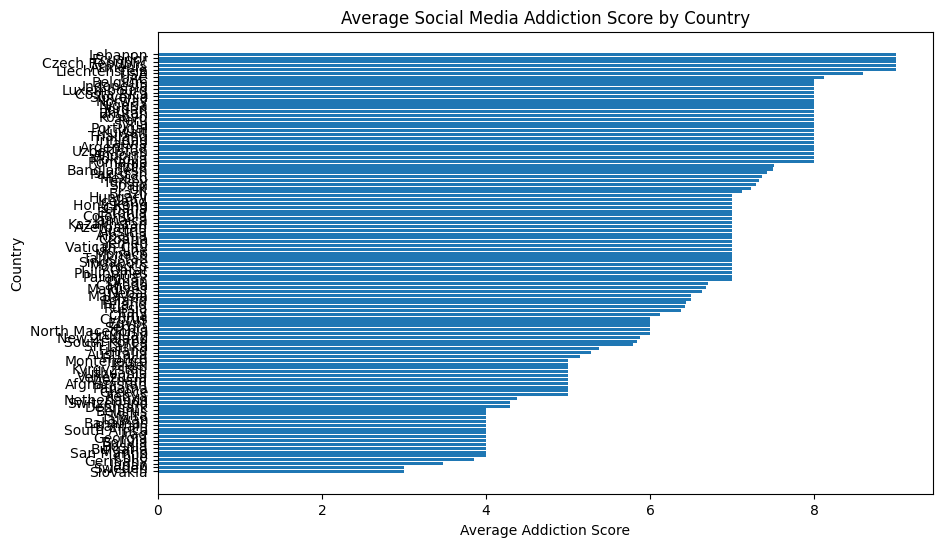

In [20]:
import matplotlib.pyplot as plt

avg_addiction = df.groupby('Country')['Addicted_Score'].mean().sort_values()

plt.figure(figsize=(10,6))
plt.barh(avg_addiction.index, avg_addiction.values)
plt.xlabel('Average Addiction Score')
plt.ylabel('Country')
plt.title('Average Social Media Addiction Score by Country')
plt.show()
